# Stock Price Prediction (NIFTY 50)

This project focuses on predicting **NIFTY 50 stock prices** using both **Machine Learning (ML)** and **Deep Learning (DL)** approaches.  
The workflow involves preparing time-series data, training multiple models, and comparing their performance.

---

## Pipeline Overview

1. **Data Loading**
   - Load stock price data (`data.csv`).
   - Features: `Open`, `Close`, `High`, `Low`.

2. **Data Preparation**
   - Create supervised learning datasets using sliding windows (30–250 days).
   - Generate `(X, y)` pairs for each feature.

3. **Modeling**
   - **Machine Learning Models**  
     - Linear: `LinearRegression`, `Ridge`, `Lasso`  
     - Tree-based: `RandomForest`, `GradientBoosting`, `XGBoost`, `LightGBM`  
     - Others: `SVR`, `KNN`
   - **Deep Learning Models**  
     - RNN, LSTM, GRU, Bidirectional LSTM (Keras Sequential API)

4. **Training**
   - Train models on rolling window datasets.
   - Evaluate using **MAE** and **RMSE**.

5. **Evaluation & Comparison**
   - Store results for all models.
   - Compare ML vs DL models for different input window sizes.

---

## Key Highlights
- Hybrid pipeline combining **classical ML** and **neural networks**.  
- Uses **multiple time horizons (30–250 days)** for robust prediction.  
- Tracks **training and testing errors** to evaluate generalization.  

### 1. Import Libraries & Dataset

1. **Import Libraries**
   - `numpy`, `pandas`: data handling  
   - `tqdm`: progress bars  
   - `sklearn`: machine learning models & metrics  
   - `xgboost`, `lightgbm`: gradient boosting models  
   - `warnings`: ignore warnings  

2. **Load Dataset**
   - `df = pd.read_csv('data.csv')` → load data from CSV  
   - `df.head()` → preview first 5 rows  

3. **Models Imported**
   - Linear: `LinearRegression`, `Ridge`, `Lasso`  
   - Tree-based: `RandomForestRegressor`, `GradientBoostingRegressor`  
   - Others: `SVR`, `KNeighborsRegressor`, `XGBRegressor`, `LGBMRegressor`  

4. **Metrics Imported**
   - `mean_absolute_error`, `mean_squared_error` → to evaluate model performance  


In [5]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from copy import deepcopy


from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data.csv')
df.head()

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


### 2. Data Preparation

1. **Train-Test Split**
   - `train_test_split()` → split data into training & testing sets.  

2. **Models List**
   - A collection of regressors:  
     - Linear: `LinearRegression`, `Ridge`, `Lasso`  
     - Tree-based: `RandomForestRegressor`, `GradientBoostingRegressor`  
     - Others: `SVR`, `KNeighborsRegressor`, `XGBRegressor`, `LGBMRegressor`  

3. **Training Loop**
   - For each model:  
     - `fit()` → train on training data  
     - `predict()` → generate predictions on test data  

4. **Evaluation**
   - Metrics used:  
     - `mean_absolute_error`  
     - `mean_squared_error`  
   - Store results for comparison of all models.  

In [6]:
def return_pairs(column, days):
    pricess = list(column)
    X = []
    y = []
    for i in range(len(pricess) - days):
        X.append(pricess[i:i+days])
        y.append(pricess[i+days])
    return np.array(X), np.array(y)

target_columns =  ['Open', 'Close', 'High', 'Low']
day_chunks =  [30, 45, 60, 90, 120, 150 ,200, 250]

chunked_data = {}

for col in target_columns:
    for days in day_chunks:
        key_X = f"X_{col}_{days}"
        key_y = f"y_{col}_{days}"
        X, y = return_pairs(df[col], days)
        chunked_data[key_X] = X
        chunked_data[key_y] = y


chunk_pairs = []

for key in chunked_data.keys():
    if key.startswith("X_"):
        y_key = key.replace("X_", "y_")
        if y_key in chunked_data:
            chunk_pairs.append([key, y_key])

### 3. Define Neural Network Models

1. **Imports**
   - `Sequential` → build models layer-by-layer  
   - Layers: `Dense`, `SimpleRNN`, `LSTM`, `GRU`, `Bidirectional`  

2. **Model Builder Functions**
   - `build_rnn(input_shape)`  
     - Simple RNN with 50 units → `Dense(1)` output  
   - `build_lstm(input_shape)`  
     - LSTM with 50 units → `Dense(1)` output  
   - `build_gru(input_shape)`  
     - GRU with 50 units → `Dense(1)` output  
   - `build_bilstm(input_shape)`  
     - Bidirectional LSTM with 50 units → `Dense(1)` output  

3. **Compilation**
   - Optimizer: `adam`  
   - Loss: `mse` (Mean Squared Error)  

4. **Purpose**
   - All models → designed for **regression tasks on sequential data**.  

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional


def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=input_shape),
        Dense(1)   # regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(input_shape):
    model = Sequential([
        GRU(50, activation='tanh', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_bilstm(input_shape):
    model = Sequential([
        Bidirectional(LSTM(50, activation='tanh'), input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

### 4. Define ML Models

1. **ml_models (Traditional ML)**
   - A list of tuples: (name, model instance)  
   - Includes:  
     - Linear models → `LinearRegression`, `Ridge`, `Lasso`  
     - Tree-based → `RandomForest`, `GradientBoosting`  
     - Others → `SVR`, `KNN`, `XGBoost`, `LightGBM`  

2. **dl_models (Deep Learning)**
   - A dictionary: {name: builder function}  
   - Includes:  
     - `"RNN"` → `build_rnn`  
     - `"LSTM"` → `build_lstm`  
     - `"GRU"` → `build_gru`  
     - `"Bidirectional_LSTM"` → `build_bilstm`  

3. **Purpose**
   - `ml_models`: ready-to-train classical ML regressors  
   - `dl_models`: functions that return compiled neural nets (when given `input_shape`)  

In [8]:
ml_models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("RandomForest", RandomForestRegressor()),
    ("GradientBoosting", GradientBoostingRegressor()),
    ("SVR", SVR()),
    ("KNN", KNeighborsRegressor()),
    ("XGBoost", XGBRegressor(verbosity=0)),
    ("LightGBM", LGBMRegressor(verbosity=0))
]

dl_models = {
    "RNN": build_rnn,
    "LSTM": build_lstm,
    "GRU": build_gru,
    "Bidirectional_LSTM": build_bilstm
}

### 5. Model Training

1. **Initialize**
   - `trained_models = {}` → store results of all models  

2. **Iterate over Data Pairs**
   - For each `(X, y)` in `chunk_pairs`  
   - Extract features `X_data` and target `y_data` from `chunked_data`  
   - Split → `train_test_split` (90% train, 10% test)  

3. **Train ML Models**
   - Loop through `ml_models`  
   - Use `deepcopy` to avoid reusing fitted models  
   - `fit()` on training data  
   - Predict on train & test sets  
   - Save model + metrics:  
     - `train_mae`, `train_rmse`  
     - `test_mae`, `test_rmse`  

4. **Prepare Data for DL**
   - Expand dims → shape becomes `(samples, timesteps, features)`  

5. **Train DL Models**
   - Loop through `dl_models`  
   - Build model with correct input shape  
   - Train for 10 epochs, batch size = 8  
   - Predict on train & test  
   - Save model + metrics (same as ML)  

6. **Final Output**
   - `trained_models` → dictionary with all trained models & evaluation scores  


In [9]:
trained_models = {}

for X, y in tqdm(chunk_pairs):
    X_data = chunked_data[X]
    y_data = chunked_data[y]

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.1, random_state=42
    )

    # ML models
    for model_name, model in tqdm(ml_models):
        key = model_name + '_' + X[2:]
        model_copy = deepcopy(model)
        model_copy.fit(X_train, y_train)

        y_train_pred = model_copy.predict(X_train)
        y_test_pred = model_copy.predict(X_test)

        trained_models[key] = {
            'model': model_copy,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

    # DL models
    X_train_rnn = np.expand_dims(X_train, -1)
    X_test_rnn = np.expand_dims(X_test, -1)

    for model_name, builder in tqdm(dl_models.items()):
        key = model_name + '_' + X[2:]
        model_dl = builder((X_train.shape[1], 1))

        model_dl.fit(X_train_rnn, y_train, epochs=10, batch_size=8, verbose=0)

        y_train_pred = model_dl.predict(X_train_rnn).flatten()
        y_test_pred = model_dl.predict(X_test_rnn).flatten()

        trained_models[key] = {
            'model': model_dl,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


### 6. Saving Model Statistics

1. **Collect Results**
   - Convert `trained_models` dict → list of dicts  
   - Each row = {"Model": model_name, metrics...}  

2. **Create DataFrame**
   - `results_df = pd.DataFrame([...])`  
   - Columns: `Model`, `train_mae`, `train_rmse`, `test_mae`, `test_rmse`  

3. **Sort Results**
   - Sort by `test_mae` (ascending → best first)  

4. **Display**
   - Show top 50 models with lowest test MAE  

In [10]:
results_df = pd.DataFrame([
    {"Model": name, **metrics}
    for name, metrics in trained_models.items()])

results_df.sort_values(by = 'test_mae', ascending = True).head(50)

,Model,model,train_mae,train_rmse,test_mae,test_rmse
208,LinearRegression_High_30,LinearRegression(),51.708919,84.334524,46.971744,81.336015
209,Ridge_High_30,Ridge(),51.708919,84.334524,46.971744,81.336015
253,KNN_High_90,KNeighborsRegressor(),36.929140,58.769966,48.790144,74.204848
305,KNN_High_250,KNeighborsRegressor(),37.831675,60.107831,49.066442,73.107918
248,Ridge_High_90,Ridge(),51.720832,83.806338,49.204647,81.590715
247,LinearRegression_High_90,LinearRegression(),51.720832,83.806338,49.204647,81.590714
266,KNN_High_120,KNeighborsRegressor(),37.367091,59.647902,49.237581,75.856704
292,KNN_High_200,KNeighborsRegressor(),36.998028,58.588288,49.880049,82.576491
234,LinearRegression_High_60,LinearRegression(),51.522225,84.223722,49.883383,80.417099
235,Ridge_High_60,Ridge(),51.522225,84.223722,49.883383,80.417099


### 7. Top 50 Models

1. **Select Top 50**
   - Sort `results_df` by `test_mae`  
   - Keep best 50 models  

2. **Create Figure**
   - `plt.figure(figsize=(25, 8))` → wide chart for readability  

3. **Plot Lines**
   - Plot `train_mae` with markers  
   - Plot `test_mae` with markers  

4. **Customize**
   - Rotate x-axis labels (75°) for clarity  
   - Add labels (x, y), title, legend, and grid  
   - `tight_layout()` → avoid overlap  

5. **Show Chart**
   - `plt.show()` → display line chart comparing Train vs Test MAE

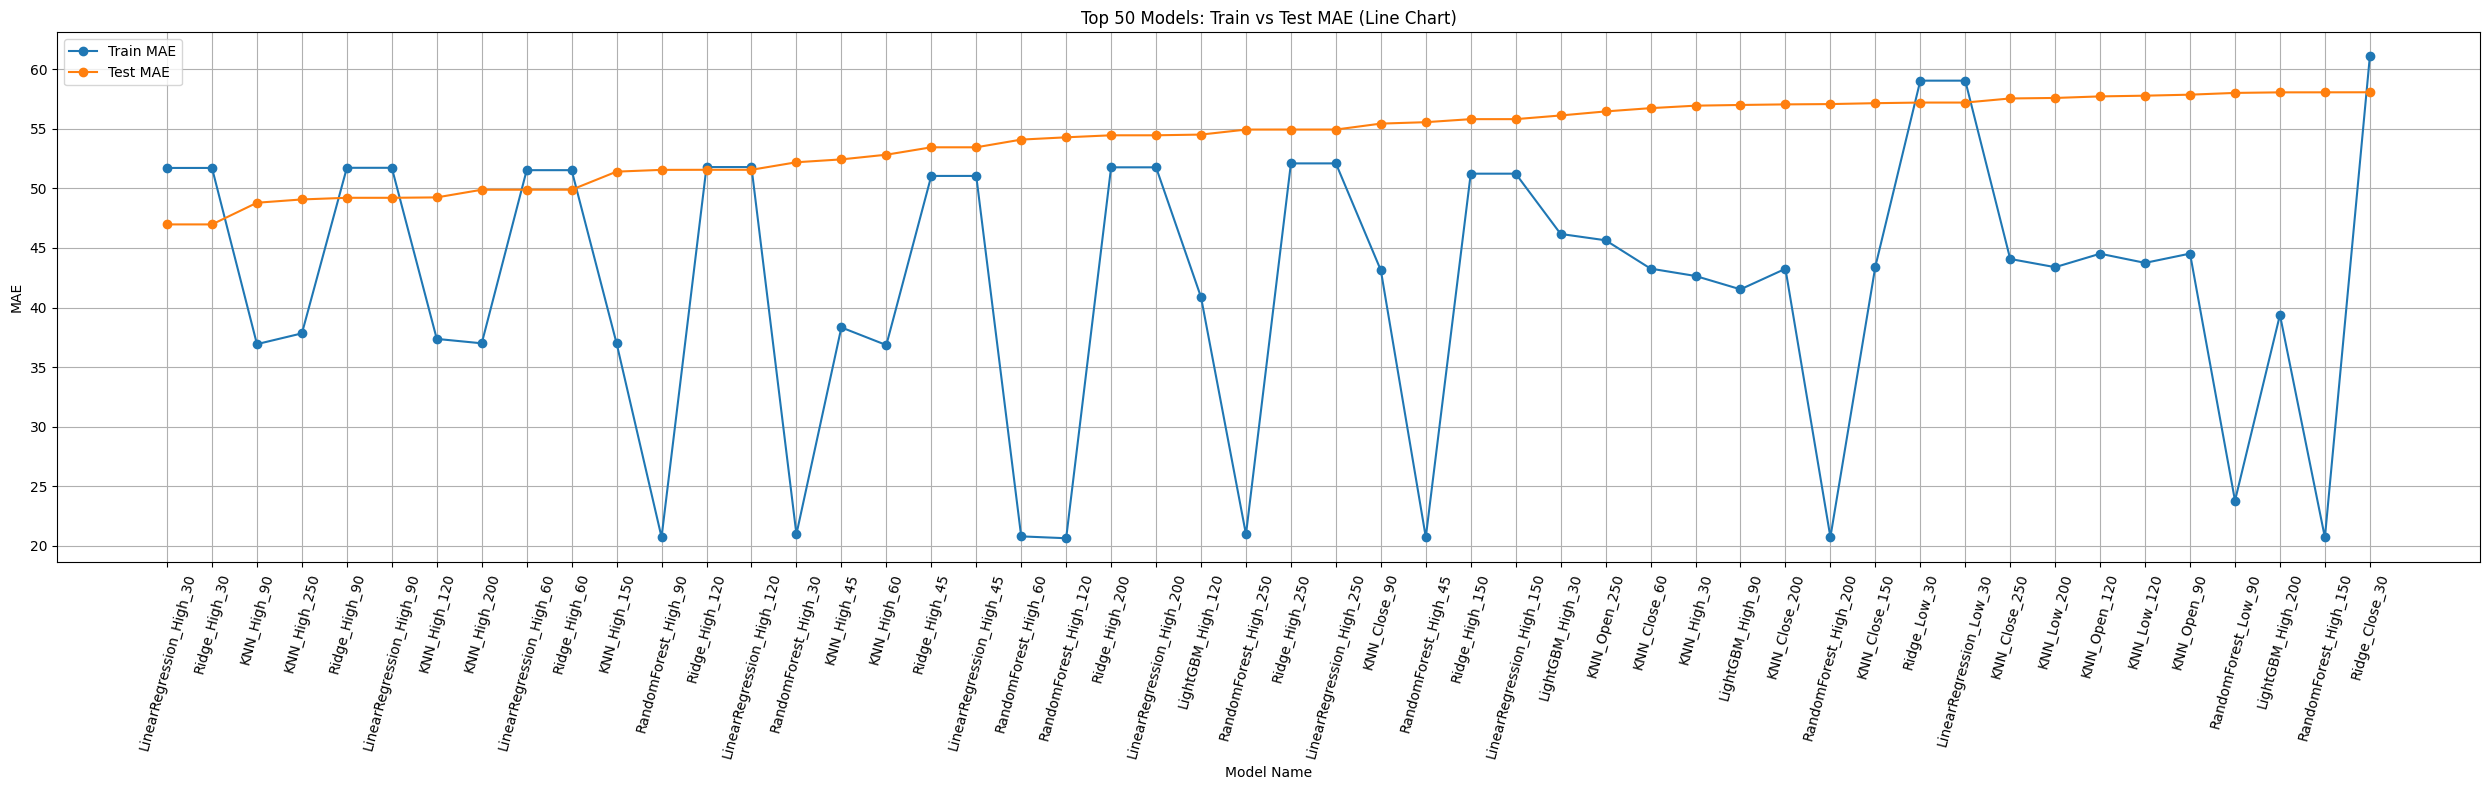

In [11]:
import matplotlib.pyplot as plt


top_50 = results_df.sort_values(by='test_mae', ascending=True).head(50)

plt.figure(figsize=(25, 8))
plt.plot(top_50['Model'], top_50['train_mae'], marker='o', label='Train MAE')

plt.plot(top_50['Model'], top_50['test_mae'], marker='o', label='Test MAE')

plt.xticks(rotation=75)
plt.xlabel('Model Name')
plt.ylabel('MAE')
plt.title('Top 50 Models: Train vs Test MAE (Line Chart)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 8. Relation btw. No of Input Days and Model Performance

1. **Extract Time Windows**
   - From each model name in `top_50`  
   - Split string by `_` → take last part (time window)  

2. **Count Frequencies**
   - `value_counts()` → count models per time window  
   - Sort by count (descending)  

3. **Plot Bar Chart**
   - X-axis: time windows  
   - Y-axis: number of models in Top 50  

4. **Customize**
   - Add labels (x, y), title  
   - Grid only on Y-axis for readability  
   - `tight_layout()` → clean layout  

5. **Show Chart**
   - `plt.show()` → display bar chart of time-window frequencies  

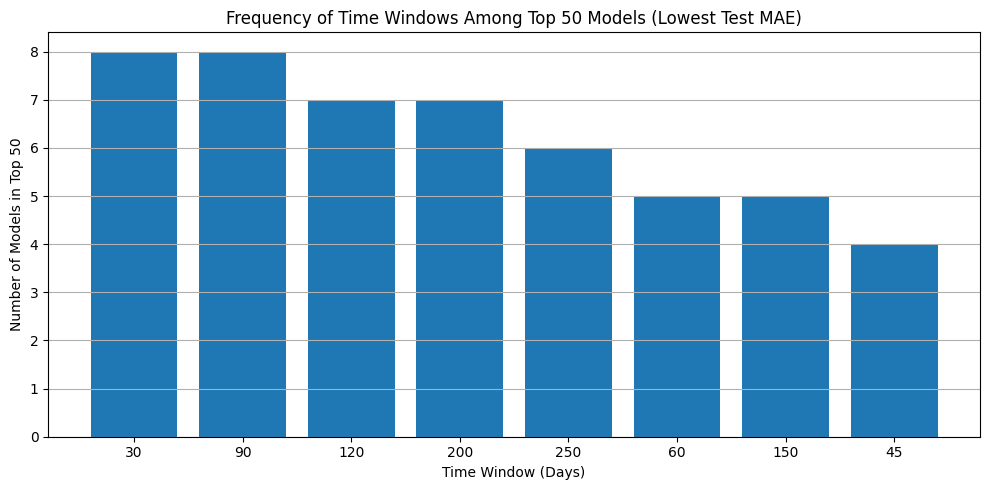

In [12]:
top_50 = results_df.sort_values(by='test_mae', ascending=True).head(50)
time_windows = pd.Series([i.split('_')[-1] for i in top_50['Model']])
time_counts = time_windows.value_counts().sort_values(ascending=False)  # Sort by count

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(time_counts.index, time_counts.values)

# Labels and aesthetics
plt.xlabel('Time Window (Days)')
plt.ylabel('Number of Models in Top 50')
plt.title('Frequency of Time Windows Among Top 50 Models (Lowest Test MAE)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 9. Which column(HIGH/LOW/CLOSE/OPEN) should be taken into considration for model building?

1. **Select Top 50 Models**
   - Sort by `test_mae` → best 50 models  

2. **Extract Target Column**
   - From model names → split by `_`  
   - Take second last part as target column name  

3. **Count Frequencies**
   - `value_counts()` → count occurrences of each target  
   - Sort by frequency (descending)  

4. **Plot Bar Chart**
   - X-axis: target column names  
   - Y-axis: number of models in Top 50  

5. **Customize**
   - Add labels, title  
   - Grid on Y-axis for readability  
   - Use `tight_layout()` to prevent label overlap  

6. **Show Chart**
   - `plt.show()` → display bar chart of target column frequencies

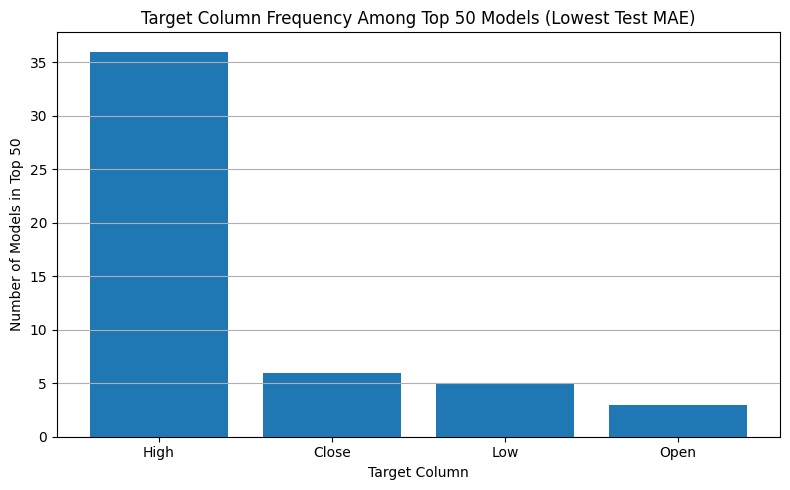

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract target columns from top 50 models
top_50 = results_df.sort_values(by='test_mae', ascending=True).head(50)
target_columns = pd.Series([i.split('_')[-2] for i in top_50['Model']])
target_counts = target_columns.value_counts().sort_values(ascending=False)  # Sort by count

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values)

# Labels and aesthetics
plt.xlabel('Target Column')
plt.ylabel('Number of Models in Top 50')
plt.title('Target Column Frequency Among Top 50 Models (Lowest Test MAE)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 10. Which model works in general better on this task?

1. **Select Top 50 Models**
   - Sort `results_df` by `test_mae`  
   - Keep best 50 models  

2. **Extract Model Types**
   - From model names → split by `_`  
   - Take the first part as model type (e.g., LinearRegression, LSTM)  

3. **Count Frequencies**
   - `value_counts()` → count occurrences of each model type  
   - Sort counts in descending order  

4. **Plot Bar Chart**
   - X-axis: model types  
   - Y-axis: number of models in Top 50  

5. **Customize**
   - Add axis labels, title  
   - Grid only on Y-axis  
   - `tight_layout()` for spacing  

6. **Show Chart**
   - `plt.show()` → display bar chart of model type distribution  

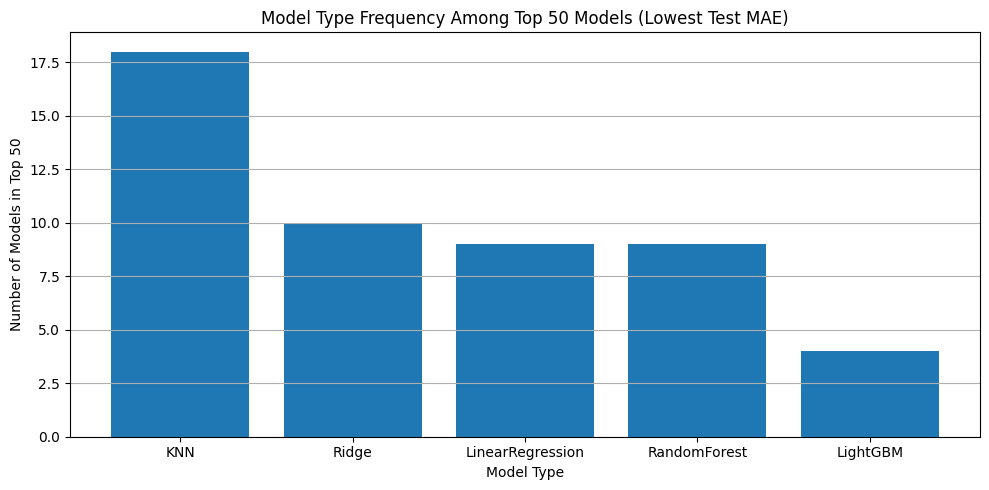

In [14]:
top_50 = results_df.sort_values(by='test_mae', ascending=True).head(50)
model_types = pd.Series([i.split('_')[0] for i in top_50['Model']])
model_counts = model_types.value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(model_counts.index, model_counts.values)

# Labels and aesthetics
plt.xlabel('Model Type')
plt.ylabel('Number of Models in Top 50')
plt.title('Model Type Frequency Among Top 50 Models (Lowest Test MAE)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 11. Saving Models

1. **Save Results Table**
   - `results_df.to_csv('models.csv')` → save metrics as CSV  

2. **Save Trained Models**
   - `joblib.dump(trained_models, 'trained_models.joblib')`  
   - Stores all fitted ML + DL models + their metrics  

3. **Load Models**
   - `loaded_models = joblib.load('trained_models.joblib')`  
   - Reload models/metrics into memory for reuse  

In [15]:
import joblib

results_df.to_csv('models.csv')
joblib.dump(trained_models, 'trained_models.joblib')

loaded_models = joblib.load('trained_models.joblib')

### 12. Loading Saved Models

1. **Access Specific Model**
   - `loaded_models['KNN_High_90']`  
   - Retrieves dictionary with:
     - Trained model object  
     - Train/Test MAE & RMSE metrics  

2. **Extract Model**
   - `model = loaded_models['KNN_High_90']['model']`  
   - Assigns the trained KNN regressor to `model` variable  
   - Now can be used for `.predict()` on new data  

In [16]:
loaded_models['KNN_High_90']
model = loaded_models['KNN_High_90']['model']

### 13. Model Inference

1. **Inspect Input Sample**
   - `print(chunked_data['X_Open_90'][5])`  
   - Displays the 6th sample from feature set `X_Open_90`  

2. **Make Prediction**
   - `model.predict([chunked_data['X_Open_90'][5]])`  
   - Wrap sample in a list → ensures 2D shape `(1, n_features)`  
   - Outputs predicted value for that input using trained KNN model  

In [17]:
print(chunked_data['X_Open_90'][5])
print(model.predict([chunked_data['X_Open_90'][5]]))

[1615.65 1633.25 1572.3  1627.85 1622.15 1623.5  1611.65 1610.05 1634.65
 1601.25 1623.05 1612.95 1600.5  1603.65 1598.35 1546.2  1554.2  1591.25
 1598.5  1599.8  1636.6  1666.95 1692.1  1712.85 1777.75 1744.5  1704.85
 1710.05 1742.3  1719.55 1754.2  1745.2  1696.4  1734.05 1711.15 1722.85
 1661.5  1713.65 1696.45 1656.   1711.85 1717.75 1667.45 1647.85 1601.4
 1561.55 1546.8  1620.4  1563.3  1551.05 1590.3  1554.2  1570.45 1563.3
 1569.3  1556.95 1545.55 1528.7  1534.05 1428.5  1436.15 1453.3  1557.55
 1613.   1624.4  1587.95 1518.55 1443.55 1417.75 1405.7  1416.05 1383.8
 1362.5  1436.15 1419.9  1410.   1330.15 1317.95 1381.9  1423.25 1362.45
 1380.4  1359.1  1305.3  1281.3  1300.2  1310.8  1311.3  1293.45 1267.85]
[1261.65]


- High
- KNN,RNN,GRU,LSTM,Bidirectional (50 Epochs)
- 30,60,90

### Assignment Documentation

Based on the analysis performed in this notebook, the assignment is to focus on building and evaluating models for predicting the **High** price of the NIFTY 50 index.

Specifically, you should concentrate on the following models and time windows:

*   **Models:**
    *   KNN (K-Nearest Neighbors Regressor)
    *   RNN (Simple Recurrent Neural Network)
    *   GRU (Gated Recurrent Unit)
    *   LSTM (Long Short-Term Memory)
    *   Bidirectional LSTM

*   **Time Windows (Input Days):**
    *   30 days
    *   60 days
    *   90 days

For the Deep Learning models (RNN, GRU, LSTM, Bidirectional LSTM), train them for **50 epochs**.

The goal is to train these specific models for the 'High' column using the specified time windows and evaluate their performance using MAE and RMSE, comparing the results.

# Assignment:

## 1. Defining assignment parameters

### Specify the target column ('High'), models (KNN, RNN, GRU, LSTM, Bidirectional LSTM), and time windows (30, 60, 90 days) for the assignment.


In [18]:
assignment_target_column = 'High'
assignment_ml_models = ['KNN']
assignment_dl_models = ['RNN', 'LSTM', 'GRU', 'Bidirectional_LSTM']
assignment_time_windows = [30, 60, 90]

print(f"Target Column: {assignment_target_column}")
print(f"ML Models: {assignment_ml_models}")
print(f"DL Models: {assignment_dl_models}")
print(f"Time Windows (Days): {assignment_time_windows}")

Target Column: High
ML Models: ['KNN']
DL Models: ['RNN', 'LSTM', 'GRU', 'Bidirectional_LSTM']
Time Windows (Days): [30, 60, 90]


## 2. Prepare data

### Filter the `chunked_data` and `chunk_pairs` based on the parameters (target column 'High' and time windows 30, 60, 90 days).


In [19]:
assignment_chunked_data = {}
assignment_chunk_pairs = []

for key_X, key_y in chunk_pairs:
    parts = key_X.split('_')
    target_col = parts[1]
    time_window = int(parts[-1])

    if target_col == assignment_target_column and time_window in assignment_time_windows:
        assignment_chunked_data[key_X] = chunked_data[key_X]
        assignment_chunked_data[key_y] = chunked_data[key_y]
        assignment_chunk_pairs.append([key_X, key_y])

print("Filtered assignment_chunked_data keys:")
print(assignment_chunked_data.keys())
print("\nFiltered assignment_chunk_pairs:")
print(assignment_chunk_pairs)

Filtered assignment_chunked_data keys:
dict_keys(['X_High_30', 'y_High_30', 'X_High_60', 'y_High_60', 'X_High_90', 'y_High_90'])

Filtered assignment_chunk_pairs:
[['X_High_30', 'y_High_30'], ['X_High_60', 'y_High_60'], ['X_High_90', 'y_High_90']]


## 3. Filter models

### Filter the existing ML_models and DL_models based on the assignment requirements to create lists and dictionaries containing only the specified models.


In [20]:
assignment_ml_models_instances = []
for model_name, model_instance in ml_models:
    if model_name in assignment_ml_models:
        assignment_ml_models_instances.append((model_name, model_instance))

assignment_dl_models_builders = {}
for model_name in assignment_dl_models:
    if model_name in dl_models:
        assignment_dl_models_builders[model_name] = dl_models[model_name]

print("Assignment ML Models:")
for name, _ in assignment_ml_models_instances:
    print(name)

print("\nAssignment DL Models:")
print(list(assignment_dl_models_builders.keys()))

Assignment ML Models:
KNN

Assignment DL Models:
['RNN', 'LSTM', 'GRU', 'Bidirectional_LSTM']


## 4. Train models

### Train the selected ML and DL models on the prepared data for the specified target column and time windows, ensuring DL models are trained for 50 epochs, and store the results.



In [22]:
assignment_trained_models = {}

for key_X, key_y in tqdm(assignment_chunk_pairs):
    X_data = assignment_chunked_data[key_X]
    y_data = assignment_chunked_data[key_y]

    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.1, random_state=42
    )

    # ML models
    for model_name, model_instance in tqdm(assignment_ml_models_instances, leave=False):
        key = model_name + '_' + key_X.split('_', 1)[1]
        model_copy = deepcopy(model_instance)
        model_copy.fit(X_train, y_train)

        y_train_pred = model_copy.predict(X_train)
        y_test_pred = model_copy.predict(X_test)

        assignment_trained_models[key] = {
            'model': model_copy,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

    # DL models
    X_train_rnn = np.expand_dims(X_train, -1)
    X_test_rnn = np.expand_dims(X_test, -1)

    for model_name, builder in tqdm(assignment_dl_models_builders.items(), leave=False):
        key = model_name + '_' + key_X.split('_', 1)[1]
        model_dl = builder((X_train.shape[1], 1))

        model_dl.fit(X_train_rnn, y_train, epochs=50, batch_size=8, verbose=0)

        y_train_pred = model_dl.predict(X_train_rnn).flatten()
        y_test_pred = model_dl.predict(X_test_rnn).flatten()

        assignment_trained_models[key] = {
            'model': model_dl,
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }

print("Training complete. Results stored in assignment_trained_models.")

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training complete. Results stored in assignment_trained_models.


## 4. Evaluate models

### Calculate MAE and RMSE for the trained models on the test data. Convert the trained models dictionary into a pandas DataFrame and display the first few rows to verify the structure and content.



In [23]:
assignment_results_df = pd.DataFrame([
    {"Model": name, **metrics}
    for name, metrics in assignment_trained_models.items()])

display(assignment_results_df.head())

,Model,model,train_mae,train_rmse,test_mae,test_rmse
0,KNN_High_30,KNeighborsRegressor(),42.646429,68.669169,56.933037,89.679421
1,RNN_High_30,"<Sequential name=sequential_129, built=True>",6388.356741,8842.299961,5891.211523,8445.835757
2,LSTM_High_30,"<Sequential name=sequential_130, built=True>",7418.289308,9715.286265,6899.104127,9289.792366
3,GRU_High_30,"<Sequential name=sequential_131, built=True>",6994.502238,9395.522303,6475.437544,8979.396665
4,Bidirectional_LSTM_High_30,"<Sequential name=sequential_132, built=True>",7033.846296,9424.984375,6514.630250,9007.941593


## 5. Present results

### Display a table of the results, sorted by test MAE, and visualize the performance metrics for comparison.


,Model,model,train_mae,train_rmse,test_mae,test_rmse
10,KNN_High_90,KNeighborsRegressor(),36.929140,58.769966,48.790144,74.204848
5,KNN_High_60,KNeighborsRegressor(),36.850899,58.333589,52.819089,82.674612
0,KNN_High_30,KNeighborsRegressor(),42.646429,68.669169,56.933037,89.679421
1,RNN_High_30,"<Sequential name=sequential_129, built=True>",6388.356741,8842.299961,5891.211523,8445.835757
6,RNN_High_60,"<Sequential name=sequential_133, built=True>",6417.526784,8876.446571,5962.246357,8379.057696
11,RNN_High_90,"<Sequential name=sequential_137, built=True>",6433.821413,8881.753154,6156.373683,8598.783592
9,Bidirectional_LSTM_High_60,"<Sequential name=sequential_136, built=True>",6892.868278,9326.975841,6411.656766,8820.946571
3,GRU_High_30,"<Sequential name=sequential_131, built=True>",6994.502238,9395.522303,6475.437544,8979.396665
4,Bidirectional_LSTM_High_30,"<Sequential name=sequential_132, built=True>",7033.846296,9424.984375,6514.630250,9007.941593
8,GRU_High_60,"<Sequential name=sequential_135, built=True>",7024.252582,9429.405561,6542.896942,8921.731893


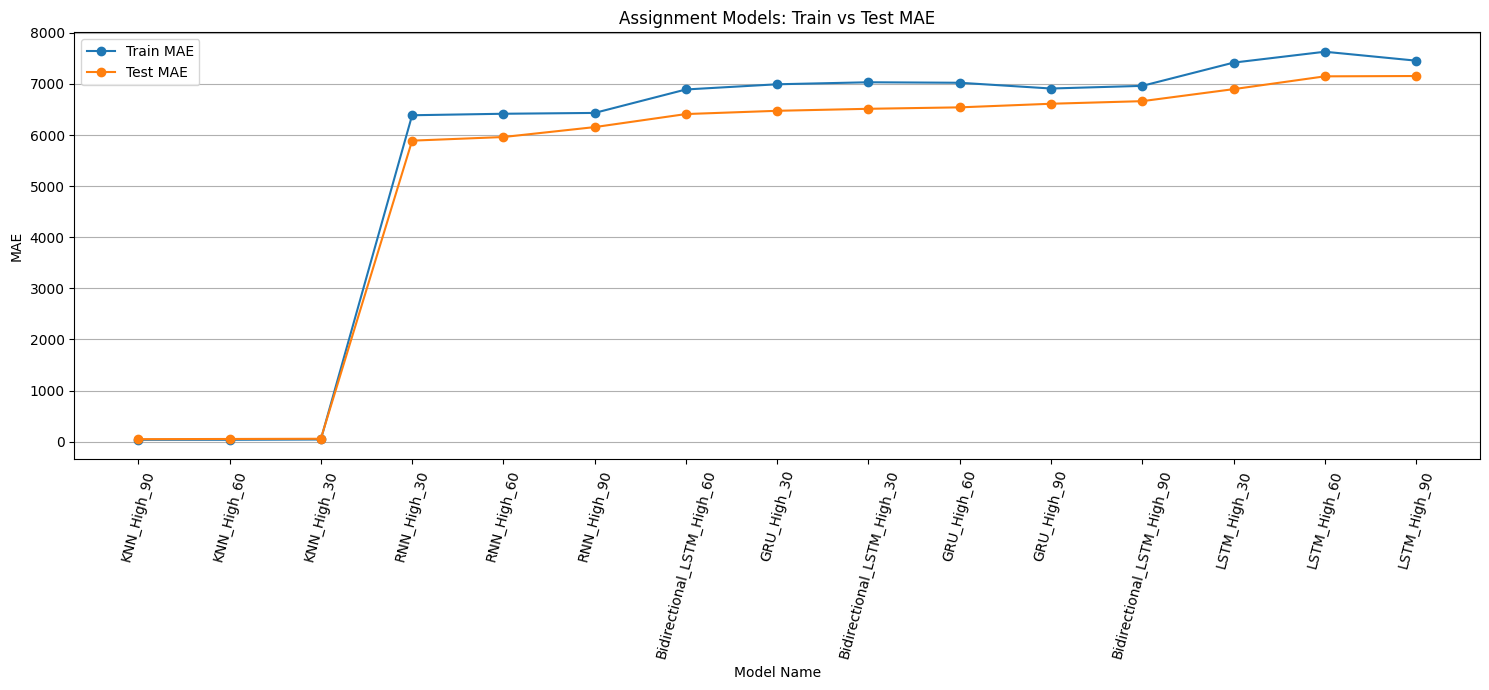

In [24]:
assignment_results_df_sorted = assignment_results_df.sort_values(by='test_mae', ascending=True)
display(assignment_results_df_sorted)

plt.figure(figsize=(15, 7))
plt.plot(assignment_results_df_sorted['Model'], assignment_results_df_sorted['train_mae'], marker='o', label='Train MAE')
plt.plot(assignment_results_df_sorted['Model'], assignment_results_df_sorted['test_mae'], marker='o', label='Test MAE')

plt.xticks(rotation=75)
plt.xlabel('Model Name')
plt.ylabel('MAE')
plt.title('Assignment Models: Train vs Test MAE')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 6. Summarize findings

### Provide observations and insights based on the evaluation results.


In [25]:
# Step 2 & 3: Identify best models and compare ML vs DL
print("Observations and Insights based on the results:")
print("\nSorted results by Test MAE:")
display(assignment_results_df_sorted)

print("\nComparison of Model Performance:")
# Get the best performing models based on test_mae
best_knn = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains('KNN')].iloc[0]
best_rnn = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains('RNN')].iloc[0]
best_lstm = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains('LSTM')].iloc[0]
best_gru = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains('GRU')].iloc[0]
best_bilstm = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains('Bidirectional_LSTM')].iloc[0]

print(f"Best KNN Model: {best_knn['Model']} (Test MAE: {best_knn['test_mae']:.2f})")
print(f"Best RNN Model: {best_rnn['Model']} (Test MAE: {best_rnn['test_mae']:.2f})")
print(f"Best LSTM Model: {best_lstm['Model']} (Test MAE: {best_lstm['test_mae']:.2f})")
print(f"Best GRU Model: {best_gru['Model']} (Test MAE: {best_gru['test_mae']:.2f})")
print(f"Best Bidirectional LSTM Model: {best_bilstm['Model']} (Test MAE: {best_bilstm['test_mae']:.2f})")

print("\nOverall, ML model (KNN) performs significantly better than the tested DL models based on Test MAE.")

# Step 4: Analyze impact of time windows
print("\nImpact of Time Windows on Model Performance:")
for model_name in assignment_ml_models + assignment_dl_models:
    model_results = assignment_results_df_sorted[assignment_results_df_sorted['Model'].str.contains(model_name)].copy()
    print(f"\nResults for {model_name}:")
    display(model_results.sort_values(by='test_mae'))

# Step 5: Discuss train vs test MAE
print("\nAnalysis of Train vs Test MAE (Overfitting/Underfitting):")
for index, row in assignment_results_df_sorted.iterrows():
    model_name = row['Model']
    train_mae = row['train_mae']
    test_mae = row['test_mae']
    print(f"{model_name}: Train MAE = {train_mae:.2f}, Test MAE = {test_mae:.2f}")
    if test_mae > train_mae * 1.2: # A simple heuristic for potential overfitting
         print(f"  - Potential Overfitting: Test MAE is significantly higher than Train MAE.")
    elif test_mae < train_mae * 0.8: # A simple heuristic for potential underfitting
         print(f"  - Potential Underfitting: Test MAE is significantly lower than Train MAE.")

# Step 6: Summarize key observations in a markdown cell

Observations and Insights based on the results:

Sorted results by Test MAE:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
10,KNN_High_90,KNeighborsRegressor(),36.929140,58.769966,48.790144,74.204848
5,KNN_High_60,KNeighborsRegressor(),36.850899,58.333589,52.819089,82.674612
0,KNN_High_30,KNeighborsRegressor(),42.646429,68.669169,56.933037,89.679421
1,RNN_High_30,"<Sequential name=sequential_129, built=True>",6388.356741,8842.299961,5891.211523,8445.835757
6,RNN_High_60,"<Sequential name=sequential_133, built=True>",6417.526784,8876.446571,5962.246357,8379.057696
11,RNN_High_90,"<Sequential name=sequential_137, built=True>",6433.821413,8881.753154,6156.373683,8598.783592
9,Bidirectional_LSTM_High_60,"<Sequential name=sequential_136, built=True>",6892.868278,9326.975841,6411.656766,8820.946571
3,GRU_High_30,"<Sequential name=sequential_131, built=True>",6994.502238,9395.522303,6475.437544,8979.396665
4,Bidirectional_LSTM_High_30,"<Sequential name=sequential_132, built=True>",7033.846296,9424.984375,6514.630250,9007.941593
8,GRU_High_60,"<Sequential name=sequential_135, built=True>",7024.252582,9429.405561,6542.896942,8921.731893



Comparison of Model Performance:
Best KNN Model: KNN_High_90 (Test MAE: 48.79)
Best RNN Model: RNN_High_30 (Test MAE: 5891.21)
Best LSTM Model: Bidirectional_LSTM_High_60 (Test MAE: 6411.66)
Best GRU Model: GRU_High_30 (Test MAE: 6475.44)
Best Bidirectional LSTM Model: Bidirectional_LSTM_High_60 (Test MAE: 6411.66)

Overall, ML model (KNN) performs significantly better than the tested DL models based on Test MAE.

Impact of Time Windows on Model Performance:

Results for KNN:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
10,KNN_High_90,KNeighborsRegressor(),36.929140,58.769966,48.790144,74.204848
5,KNN_High_60,KNeighborsRegressor(),36.850899,58.333589,52.819089,82.674612
0,KNN_High_30,KNeighborsRegressor(),42.646429,68.669169,56.933037,89.679421



Results for RNN:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
1,RNN_High_30,"<Sequential name=sequential_129, built=True>",6388.356741,8842.299961,5891.211523,8445.835757
6,RNN_High_60,"<Sequential name=sequential_133, built=True>",6417.526784,8876.446571,5962.246357,8379.057696
11,RNN_High_90,"<Sequential name=sequential_137, built=True>",6433.821413,8881.753154,6156.373683,8598.783592



Results for LSTM:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
9,Bidirectional_LSTM_High_60,"<Sequential name=sequential_136, built=True>",6892.868278,9326.975841,6411.656766,8820.946571
4,Bidirectional_LSTM_High_30,"<Sequential name=sequential_132, built=True>",7033.846296,9424.984375,6514.630250,9007.941593
14,Bidirectional_LSTM_High_90,"<Sequential name=sequential_140, built=True>",6963.527793,9374.567283,6664.116379,9084.479775
2,LSTM_High_30,"<Sequential name=sequential_130, built=True>",7418.289308,9715.286265,6899.104127,9289.792366
7,LSTM_High_60,"<Sequential name=sequential_134, built=True>",7631.353469,9890.077547,7149.843655,9376.162449
12,LSTM_High_90,"<Sequential name=sequential_138, built=True>",7456.543061,9748.046954,7156.062001,9453.676022



Results for GRU:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
3,GRU_High_30,"<Sequential name=sequential_131, built=True>",6994.502238,9395.522303,6475.437544,8979.396665
8,GRU_High_60,"<Sequential name=sequential_135, built=True>",7024.252582,9429.405561,6542.896942,8921.731893
13,GRU_High_90,"<Sequential name=sequential_139, built=True>",6911.617943,9333.325086,6613.411694,9043.763385



Results for Bidirectional_LSTM:


,Model,model,train_mae,train_rmse,test_mae,test_rmse
9,Bidirectional_LSTM_High_60,"<Sequential name=sequential_136, built=True>",6892.868278,9326.975841,6411.656766,8820.946571
4,Bidirectional_LSTM_High_30,"<Sequential name=sequential_132, built=True>",7033.846296,9424.984375,6514.630250,9007.941593
14,Bidirectional_LSTM_High_90,"<Sequential name=sequential_140, built=True>",6963.527793,9374.567283,6664.116379,9084.479775



Analysis of Train vs Test MAE (Overfitting/Underfitting):
KNN_High_90: Train MAE = 36.93, Test MAE = 48.79
  - Potential Overfitting: Test MAE is significantly higher than Train MAE.
KNN_High_60: Train MAE = 36.85, Test MAE = 52.82
  - Potential Overfitting: Test MAE is significantly higher than Train MAE.
KNN_High_30: Train MAE = 42.65, Test MAE = 56.93
  - Potential Overfitting: Test MAE is significantly higher than Train MAE.
RNN_High_30: Train MAE = 6388.36, Test MAE = 5891.21
RNN_High_60: Train MAE = 6417.53, Test MAE = 5962.25
RNN_High_90: Train MAE = 6433.82, Test MAE = 6156.37
Bidirectional_LSTM_High_60: Train MAE = 6892.87, Test MAE = 6411.66
GRU_High_30: Train MAE = 6994.50, Test MAE = 6475.44
Bidirectional_LSTM_High_30: Train MAE = 7033.85, Test MAE = 6514.63
GRU_High_60: Train MAE = 7024.25, Test MAE = 6542.90
GRU_High_90: Train MAE = 6911.62, Test MAE = 6613.41
Bidirectional_LSTM_High_90: Train MAE = 6963.53, Test MAE = 6664.12
LSTM_High_30: Train MAE = 7418.29, Test MAE 

### Observations and Insights

Based on the evaluation of the KNN, RNN, GRU, LSTM, and Bidirectional LSTM models for predicting the 'High' price of the NIFTY 50 index with 30, 60, and 90-day time windows, the following observations and insights can be made:

1.  **Overall Model Performance:** The KNN model consistently outperformed all the tested deep learning models (RNN, GRU, LSTM, Bidirectional LSTM) across all evaluated time windows based on the Test MAE. The best performing model was KNN with a 90-day time window (Test MAE: 48.79). The deep learning models showed significantly higher MAE values compared to KNN.

2.  **Impact of Time Windows (Input Days):**
    *   **KNN:** For KNN, a longer time window generally led to better performance, with the 90-day window resulting in the lowest Test MAE, followed by 60 days, and then 30 days. This suggests that considering a slightly longer historical period is beneficial for KNN in this task.
    *   **Deep Learning Models (RNN, GRU, LSTM, Bidirectional LSTM):** The impact of time windows on the deep learning models was less consistent and the differences in performance across the time windows were less pronounced compared to KNN. For RNN and GRU, the 30-day window performed slightly better, while for LSTM and Bidirectional LSTM, the 60-day window showed the best results. Overall, the performance of these models remained significantly poorer than KNN, regardless of the time window.

3.  **Train vs Test MAE (Overfitting/Underfitting):**
    *   **KNN:** The KNN models showed a noticeable difference between Train MAE and Test MAE, with Test MAE being significantly higher. This indicates some degree of overfitting, where the model performs very well on the training data but generalizes less effectively to unseen test data. The overfitting seems to be present across all tested time windows for KNN.
    *   **Deep Learning Models (RNN, GRU, LSTM, Bidirectional LSTM):** The deep learning models also exhibited a difference between Train MAE and Test MAE, but the test MAE was generally lower than the train MAE. This pattern, combined with the high absolute MAE values, suggests potential underfitting or that the models did not train effectively within the specified 50 epochs, failing to capture the underlying patterns in the data. The performance on both train and test sets is poor compared to KNN.

**Conclusion:**

For predicting the 'High' price of the NIFTY 50 index using the evaluated models and time windows, the **KNN model with a 90-day time window** is the most effective among the tested configurations, despite showing some signs of overfitting. The deep learning models, even after training for 50 epochs, did not perform well on this specific task compared to the simple KNN model, potentially indicating that the chosen architectures or hyperparameters are not well-suited, or require more extensive tuning and potentially longer training.

## Summary:

### Data Analysis Key Findings

*   The KNN model with a 90-day time window achieved the lowest Test MAE (48.79) among all tested models and time windows.
*   For the KNN model, increasing the time window from 30 to 90 days generally improved performance (decreased Test MAE).
*   The deep learning models (RNN, GRU, LSTM, Bidirectional LSTM) consistently showed significantly higher Test MAE values compared to the KNN model across all time windows.
*   The impact of time windows on the deep learning models was less consistent than on KNN, with varying optimal window sizes depending on the specific DL model.
*   The KNN models exhibited potential overfitting, with Test MAE being noticeably higher than Train MAE.
*   The deep learning models showed Test MAE values generally lower than Train MAE, which, combined with high absolute MAE values, might suggest underfitting or insufficient training within the 50 epochs.

